> Code to accompany **Chapter 6: Methods for Generating Adversarial Perturbation**

# Experimenting with a Random (naive) attack

This Jupyter notebook tests how difficult it would be to create an adversarial image by chance using random perturbation.

## Import the pre-trained  Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('../models/fashion-MNIST.h5')

Instructions for updating:
Colocations handled automatically by placer.


## Select our image and get its predictions

First select the image and resize it.

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


float64


Predictions for image: [2.0942072e-05 2.2307542e-05 1.9914673e-05 1.6197757e-05 9.6050380e-06
 1.1245785e-01 1.6314150e-05 8.8126218e-01 5.7682525e-03 4.0644084e-04]
7


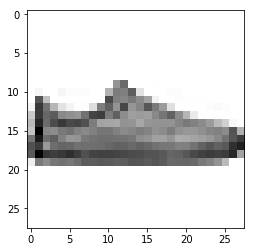

In [47]:
image_num = 12
predictions = model.predict(test_images)
image = test_images[image_num]
print("Predictions for image:", predictions[image_num])
label = np.argmax(predictions[image_num])
print(label)
plt.imshow(test_images[image_num], cmap=plt.cm.binary)

## Incrementally add random perturbation

In [48]:
max_perturb = 30 # This is maximum perturbation increase or decreased
num_iterations = 12

In [49]:
perturbed_images = np.empty((num_iterations,28,28), dtype='float64')
new_image = image
perturbed_images[0] = new_image
for i in range(num_iterations-1):
    r = np.random.RandomState(i)
    new_image_unclipped = new_image + (r.randint(-(max_perturb+1), max_perturb+1, size=(28,28)))/255
    # Clip the image so that it doesn't include pixel values outside 0 and 255
    new_image = np.clip(new_image_unclipped, 0, 1)
    perturbed_images[i+1] = new_image

In [50]:
perturbed_predictions = model.predict(perturbed_images)

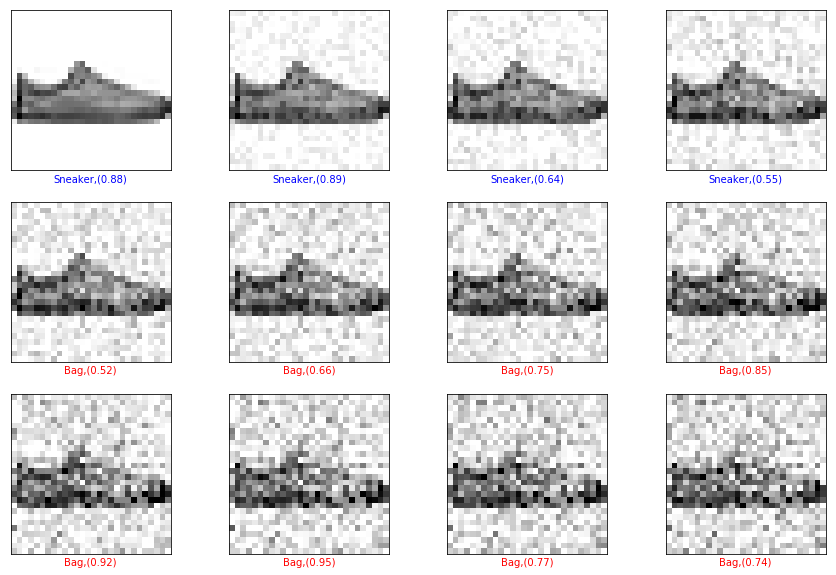

In [51]:
plt.figure(figsize=(15, 10))
for i in range(num_iterations):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(perturbed_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(perturbed_predictions[i])
    if predicted_label == label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{},({:.2f})".format(class_names[predicted_label],
                                    perturbed_predictions[i][predicted_label]),
                                    color=color)  